In [1]:
import requests
import json
#from config import api_key
#from config import g_key
from pprint import pprint
import pandas as pd
import numpy as np
from datetime import datetime

query_tx_url="https://api.covidtracking.com/v1/states/tx/daily.csv"
query_ny_url="https://api.covidtracking.com/v1/states/ny/daily.csv"
query_all_url="https://api.covidtracking.com/v1/states/daily.csv"

fileTLM1_to_load = "Resources/Texas Labor Market CES Data.csv"
fileTLM2_to_load = "Resources/Texas Labor Market Indicators.csv"
fileTLM3_to_load = "Resources/Texas Labor Market LAUS Data.csv"

In [2]:
covid_tx_df = pd.read_csv(query_tx_url)
covid_tx_df.head()

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200918,TX,682241,4762560.0,NaN,5444801,3172.0,NaN,1107.0,NaN,...,5444801,123,0,ecd1ca36d76270bcd4b77ada2f0add927eefacb3,0,0,0,0,0,NaN
1,20200917,TX,678819,4666357.0,NaN,5345176,3246.0,NaN,1139.0,NaN,...,5345176,112,0,9b4145f5a33cef8faf0d9de3cd4203e399202cdc,0,0,0,0,0,NaN
2,20200916,TX,674772,4624848.0,NaN,5299620,3249.0,NaN,1139.0,NaN,...,5299620,135,0,cdd3a269c4ab391d420a2edd134594145b352756,0,0,0,0,0,NaN
3,20200915,TX,668746,4578796.0,NaN,5247542,3311.0,NaN,1151.0,NaN,...,5247542,132,0,31123d2efe9025c61538d9aba05b61667c44a44f,0,0,0,0,0,NaN
4,20200914,TX,663445,4549802.0,NaN,5213247,3391.0,NaN,1165.0,NaN,...,5213247,21,0,b2ef9cf110a11f5d34226b715a3a49a044b3a78d,0,0,0,0,0,NaN


In [3]:
#Josh
#Find good data
valid = covid_tx_df["positive"].nunique()
total = covid_tx_df["positive"].count()

valid,total

#Needed Data
sept_20_tx_df = covid_tx_df[["date", "positive", "negative"]]
sept_texas_per = covid_tx_df["positive"]/(covid_tx_df["positive"] + covid_tx_df["negative"])

sept_20_tx_df["% Pos"] = sept_texas_per

#May need to extract day, month, year into separate 
#and format data so that all df's match
#analysis_df.style.format({"date":"{}",
                          #"negative":"{:,.0f}",
                         #"% Pos", "{:.1f}%""})


sept_20_tx_df.head()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,date,positive,negative,% Pos
0,20200918,682241,4762560.0,0.125301
1,20200917,678819,4666357.0,0.126997
2,20200916,674772,4624848.0,0.127325
3,20200915,668746,4578796.0,0.127440
4,20200914,663445,4549802.0,0.127261


In [4]:
# Find null values
sept_20_tx_df.isnull().any(axis=1)

#Drop all null values and create a clean dataframe
sept_20_tx_df = sept_20_tx_df.dropna(how="any")
sept_20_tx_df.head()


#Use this to compare %pos by date or to verify an event by date

,date,positive,negative,% Pos
0,20200918,682241,4762560.0,0.125301
1,20200917,678819,4666357.0,0.126997
2,20200916,674772,4624848.0,0.127325
3,20200915,668746,4578796.0,0.127440
4,20200914,663445,4549802.0,0.127261


In [5]:
TLM1_data = pd.read_csv(fileTLM1_to_load)
TLM1_data.head()

,Industry,20-Jul,20-Jun,19-Jul,Monthly Change,Monthly % Change,Annual Change,Annual\n% Change,Unnamed: 8
0,TOTAL NONFARM,"12,087,800","12,145,700","12,765,800","-57,900",-0.50%,"-678,000",-5.30%,NaN
1,TOTAL PRIVATE,"10,231,200","10,254,600","10,865,900","-23,400",-0.20%,"-634,700",-5.80%,NaN
2,GOODS PRODUCING,"1,807,600","1,815,800","1,942,200","-8,200",-0.50%,"-134,600",-6.90%,NaN
3,"Mining and Logging (NAICS 21, 1133)","191,500","192,700","250,700","-1,200",-0.60%,"-59,200",-23.60%,NaN
4,Oil and Gas Extraction (NAICS 211),"70,500","69,300","77,800","1,200",1.70%,"-7,300",-9.40%,NaN


In [6]:
TLM2_data = pd.read_csv(fileTLM2_to_load)
TLM2_data.head()

,Date,Texas,U.S.,Unnamed: 3,Unnamed: 4
0,10-Jan,$21.31,$22.51,NaN,NaN
1,10-Feb,$21.41,$22.57,NaN,NaN
2,10-Mar,$21.31,$22.48,NaN,NaN
3,10-Apr,$21.42,$22.53,NaN,NaN
4,10-May,$21.39,$22.60,NaN,NaN


In [7]:
TLM3_data = pd.read_csv(fileTLM3_to_load)
TLM3_data.head()

,Metro Areas,Civilian Labor Force\nJuly\n2020,Employed\nJuly\n2020,Unemployed\nJuly\n2020,Rate\nJuly\n2020,Civilian Labor Force\nJune\n2020,Employed\nJune\n2020,Unemployed\nJune\n2020,Rate\nJune\n2020,Civilian Labor Force July\n2019,Employed\nJuly\n2019,Unemployed\nJuly\n2019,Rate\nJuly\n2019,Unnamed: 13,Unnamed: 14
0,United States,"161,374,000","144,492,000","16,882,000",10.5,"160,883,000","142,811,000","18,072,000",11.2,"164,941,000","158,385,000","6,556,000",4.0,NaN,NaN
1,Texas,"13,846,028","12,705,927","1,140,101",8.2,"13,804,456","12,606,499","1,197,957",8.7,"14,064,960","13,524,473","540,487",3.8,NaN,NaN
2,Abilene,"77,159","72,572","4,587",5.9,"76,433","71,618","4,815",6.3,"78,826","76,205","2,621",3.3,NaN,NaN
3,Amarillo,"125,356","118,920","6,436",5.1,"125,167","117,796","7,371",5.9,"132,139","128,314","3,825",2.9,NaN,NaN
4,Austin-Round Rock,"1,225,085","1,143,143","81,942",6.7,"1,215,025","1,126,397","88,628",7.3,"1,240,719","1,204,386","36,333",2.9,NaN,NaN


In [8]:
covid_ny_df = pd.read_csv(query_ny_url)
covid_ny_df

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200918,NY,448052,9263595,NaN,9711647,478.0,89995.0,141.0,NaN,...,9711647,10,0,484099c5cadb392fbd9a1cdd91d0dfbb3d880cf9,0,0,0,0,0,NaN
1,20200917,NY,447262,9174658,NaN,9621920,486.0,89995.0,135.0,NaN,...,9621920,3,0,5e44bc2c7424a256603012991c84a330c2f41244,0,0,0,0,0,NaN
2,20200916,NY,446366,9084050,NaN,9530416,483.0,89995.0,138.0,NaN,...,9530416,5,0,247d677a0fea26706b310e8053dd5198afd55927,0,0,0,0,0,NaN
3,20200915,NY,445714,9009615,NaN,9455329,481.0,89995.0,144.0,NaN,...,9455329,11,0,dff1d805592ccd3c7f86828c445b52061d34bd97,0,0,0,0,0,NaN
4,20200914,NY,444948,8936703,NaN,9381651,464.0,89995.0,143.0,NaN,...,9381651,4,0,6a2fb762bc87056f5df959d1f8988e03ed4f2e95,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,20200308,NY,105,92,NaN,197,NaN,NaN,NaN,NaN,...,197,0,0,8b4ccf56cc9ddfaacef5d4e42a99d94dfee8af12,0,0,0,0,0,NaN
195,20200307,NY,76,92,236.0,168,NaN,NaN,NaN,NaN,...,168,0,0,5c70fd54b6db8b216a2cbb0636071acd6a1517ca,0,0,0,0,0,NaN
196,20200306,NY,33,92,236.0,125,NaN,NaN,NaN,NaN,...,125,0,0,d6fb329fc7e2f5a6593ed3c3f4cdf8302dd618e0,0,0,0,0,0,NaN
197,20200305,NY,22,76,24.0,98,NaN,NaN,NaN,NaN,...,98,0,0,4e6700472deb64bcf0ae6c56393e0cb700af0510,0,0,0,0,0,NaN


In [9]:
covid_all_df = pd.read_csv(query_all_url)
covid_all_df

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200918,AK,7587.0,410706.0,NaN,418293.0,36.0,NaN,NaN,NaN,...,418293,1,0,cc5fc47f4be842f963af84b7fcd10209b229c2b9,0,0,0,0,0,NaN
1,20200918,AL,142863.0,910192.0,NaN,1039010.0,744.0,16227.0,NaN,1638.0,...,1053055,27,148,1d80c9982122b8a5e07be65d84c08ac3b4d4e74e,0,0,0,0,0,NaN
2,20200918,AR,74082.0,794097.0,NaN,866435.0,372.0,4896.0,193.0,NaN,...,868179,7,0,f2a66b16a735419549a96a760bcf829a8594a586,0,0,0,0,0,NaN
3,20200918,AS,0.0,1571.0,NaN,1571.0,NaN,NaN,NaN,NaN,...,1571,0,0,4953337207aa6ea9f70d3e91b93db3bd67bd2589,0,0,0,0,0,NaN
4,20200918,AZ,212942.0,1149377.0,NaN,1362319.0,516.0,21865.0,130.0,NaN,...,1362319,42,44,a326957ad5bbabb2b7d4f6d97e63c725b2420f9c,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,20200124,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,91ed2b32e5ff5acb216ea86f7f5ef0025b379333,0,0,0,0,0,NaN
11126,20200123,MA,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,0,0,0,885628de5b5c6da109b79adb7faad55e4815624a,0,0,0,0,0,NaN
11127,20200123,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,85ec142b4c54b40a2188c02b3c028e42052b1c45,0,0,0,0,0,NaN
11128,20200122,MA,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,0,0,0,0f3eebd5c4a00d0aaa235b0534bd4243794652b6,0,0,0,0,0,NaN


In [13]:
covid_tx_df['date'] = pd.to_datetime(covid_tx_df['date'], format='%Y%m%d')
covid_ny_df['date'] = pd.to_datetime(covid_ny_df['date'], format='%Y%m%d')
covid_all_df['date'] = pd.to_datetime(covid_all_df['date'], format='%Y%m%d')

In [14]:
covid_tx_df

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-09-18,TX,682241,4762560.0,NaN,5444801,3172.0,NaN,1107.0,NaN,...,5444801,123,0,ecd1ca36d76270bcd4b77ada2f0add927eefacb3,0,0,0,0,0,NaN
1,2020-09-17,TX,678819,4666357.0,NaN,5345176,3246.0,NaN,1139.0,NaN,...,5345176,112,0,9b4145f5a33cef8faf0d9de3cd4203e399202cdc,0,0,0,0,0,NaN
2,2020-09-16,TX,674772,4624848.0,NaN,5299620,3249.0,NaN,1139.0,NaN,...,5299620,135,0,cdd3a269c4ab391d420a2edd134594145b352756,0,0,0,0,0,NaN
3,2020-09-15,TX,668746,4578796.0,NaN,5247542,3311.0,NaN,1151.0,NaN,...,5247542,132,0,31123d2efe9025c61538d9aba05b61667c44a44f,0,0,0,0,0,NaN
4,2020-09-14,TX,663445,4549802.0,NaN,5213247,3391.0,NaN,1165.0,NaN,...,5213247,21,0,b2ef9cf110a11f5d34226b715a3a49a044b3a78d,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2020-03-08,TX,8,NaN,NaN,8,NaN,NaN,NaN,NaN,...,8,0,0,f94e478683fbfcc8099c8c30041dbacebf8d9550,0,0,0,0,0,NaN
195,2020-03-07,TX,8,NaN,NaN,8,NaN,NaN,NaN,NaN,...,8,0,0,8879e97aec342418e578906886082ae70c76bed1,0,0,0,0,0,NaN
196,2020-03-06,TX,5,NaN,NaN,5,NaN,NaN,NaN,NaN,...,5,0,0,2e9ea0bb353851b7cc519c04dfb73aaa9b780b2e,0,0,0,0,0,NaN
197,2020-03-05,TX,1,NaN,NaN,1,NaN,NaN,NaN,NaN,...,1,0,0,b6c2d2da54bf32da455dc064c25b46362e2c5249,0,0,0,0,0,NaN


In [15]:
covid_ny_df

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-09-18,NY,448052,9263595,NaN,9711647,478.0,89995.0,141.0,NaN,...,9711647,10,0,484099c5cadb392fbd9a1cdd91d0dfbb3d880cf9,0,0,0,0,0,NaN
1,2020-09-17,NY,447262,9174658,NaN,9621920,486.0,89995.0,135.0,NaN,...,9621920,3,0,5e44bc2c7424a256603012991c84a330c2f41244,0,0,0,0,0,NaN
2,2020-09-16,NY,446366,9084050,NaN,9530416,483.0,89995.0,138.0,NaN,...,9530416,5,0,247d677a0fea26706b310e8053dd5198afd55927,0,0,0,0,0,NaN
3,2020-09-15,NY,445714,9009615,NaN,9455329,481.0,89995.0,144.0,NaN,...,9455329,11,0,dff1d805592ccd3c7f86828c445b52061d34bd97,0,0,0,0,0,NaN
4,2020-09-14,NY,444948,8936703,NaN,9381651,464.0,89995.0,143.0,NaN,...,9381651,4,0,6a2fb762bc87056f5df959d1f8988e03ed4f2e95,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2020-03-08,NY,105,92,NaN,197,NaN,NaN,NaN,NaN,...,197,0,0,8b4ccf56cc9ddfaacef5d4e42a99d94dfee8af12,0,0,0,0,0,NaN
195,2020-03-07,NY,76,92,236.0,168,NaN,NaN,NaN,NaN,...,168,0,0,5c70fd54b6db8b216a2cbb0636071acd6a1517ca,0,0,0,0,0,NaN
196,2020-03-06,NY,33,92,236.0,125,NaN,NaN,NaN,NaN,...,125,0,0,d6fb329fc7e2f5a6593ed3c3f4cdf8302dd618e0,0,0,0,0,0,NaN
197,2020-03-05,NY,22,76,24.0,98,NaN,NaN,NaN,NaN,...,98,0,0,4e6700472deb64bcf0ae6c56393e0cb700af0510,0,0,0,0,0,NaN


In [16]:
covid_all_df

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-09-18,AK,7587.0,410706.0,NaN,418293.0,36.0,NaN,NaN,NaN,...,418293,1,0,cc5fc47f4be842f963af84b7fcd10209b229c2b9,0,0,0,0,0,NaN
1,2020-09-18,AL,142863.0,910192.0,NaN,1039010.0,744.0,16227.0,NaN,1638.0,...,1053055,27,148,1d80c9982122b8a5e07be65d84c08ac3b4d4e74e,0,0,0,0,0,NaN
2,2020-09-18,AR,74082.0,794097.0,NaN,866435.0,372.0,4896.0,193.0,NaN,...,868179,7,0,f2a66b16a735419549a96a760bcf829a8594a586,0,0,0,0,0,NaN
3,2020-09-18,AS,0.0,1571.0,NaN,1571.0,NaN,NaN,NaN,NaN,...,1571,0,0,4953337207aa6ea9f70d3e91b93db3bd67bd2589,0,0,0,0,0,NaN
4,2020-09-18,AZ,212942.0,1149377.0,NaN,1362319.0,516.0,21865.0,130.0,NaN,...,1362319,42,44,a326957ad5bbabb2b7d4f6d97e63c725b2420f9c,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,2020-01-24,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,91ed2b32e5ff5acb216ea86f7f5ef0025b379333,0,0,0,0,0,NaN
11126,2020-01-23,MA,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,0,0,0,885628de5b5c6da109b79adb7faad55e4815624a,0,0,0,0,0,NaN
11127,2020-01-23,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,85ec142b4c54b40a2188c02b3c028e42052b1c45,0,0,0,0,0,NaN
11128,2020-01-22,MA,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,0,0,0,0f3eebd5c4a00d0aaa235b0534bd4243794652b6,0,0,0,0,0,NaN


In [17]:
covid_tx_df.set_index('date')

,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-09-18,TX,682241,4762560.0,NaN,5444801,3172.0,NaN,1107.0,NaN,NaN,...,5444801,123,0,ecd1ca36d76270bcd4b77ada2f0add927eefacb3,0,0,0,0,0,NaN
2020-09-17,TX,678819,4666357.0,NaN,5345176,3246.0,NaN,1139.0,NaN,NaN,...,5345176,112,0,9b4145f5a33cef8faf0d9de3cd4203e399202cdc,0,0,0,0,0,NaN
2020-09-16,TX,674772,4624848.0,NaN,5299620,3249.0,NaN,1139.0,NaN,NaN,...,5299620,135,0,cdd3a269c4ab391d420a2edd134594145b352756,0,0,0,0,0,NaN
2020-09-15,TX,668746,4578796.0,NaN,5247542,3311.0,NaN,1151.0,NaN,NaN,...,5247542,132,0,31123d2efe9025c61538d9aba05b61667c44a44f,0,0,0,0,0,NaN
2020-09-14,TX,663445,4549802.0,NaN,5213247,3391.0,NaN,1165.0,NaN,NaN,...,5213247,21,0,b2ef9cf110a11f5d34226b715a3a49a044b3a78d,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-08,TX,8,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,...,8,0,0,f94e478683fbfcc8099c8c30041dbacebf8d9550,0,0,0,0,0,NaN
2020-03-07,TX,8,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,...,8,0,0,8879e97aec342418e578906886082ae70c76bed1,0,0,0,0,0,NaN
2020-03-06,TX,5,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,...,5,0,0,2e9ea0bb353851b7cc519c04dfb73aaa9b780b2e,0,0,0,0,0,NaN


In [18]:
covid_ny_df.set_index('date')

,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-09-18,NY,448052,9263595,NaN,9711647,478.0,89995.0,141.0,NaN,62.0,...,9711647,10,0,484099c5cadb392fbd9a1cdd91d0dfbb3d880cf9,0,0,0,0,0,NaN
2020-09-17,NY,447262,9174658,NaN,9621920,486.0,89995.0,135.0,NaN,68.0,...,9621920,3,0,5e44bc2c7424a256603012991c84a330c2f41244,0,0,0,0,0,NaN
2020-09-16,NY,446366,9084050,NaN,9530416,483.0,89995.0,138.0,NaN,67.0,...,9530416,5,0,247d677a0fea26706b310e8053dd5198afd55927,0,0,0,0,0,NaN
2020-09-15,NY,445714,9009615,NaN,9455329,481.0,89995.0,144.0,NaN,60.0,...,9455329,11,0,dff1d805592ccd3c7f86828c445b52061d34bd97,0,0,0,0,0,NaN
2020-09-14,NY,444948,8936703,NaN,9381651,464.0,89995.0,143.0,NaN,59.0,...,9381651,4,0,6a2fb762bc87056f5df959d1f8988e03ed4f2e95,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-08,NY,105,92,NaN,197,NaN,NaN,NaN,NaN,NaN,...,197,0,0,8b4ccf56cc9ddfaacef5d4e42a99d94dfee8af12,0,0,0,0,0,NaN
2020-03-07,NY,76,92,236.0,168,NaN,NaN,NaN,NaN,NaN,...,168,0,0,5c70fd54b6db8b216a2cbb0636071acd6a1517ca,0,0,0,0,0,NaN
2020-03-06,NY,33,92,236.0,125,NaN,NaN,NaN,NaN,NaN,...,125,0,0,d6fb329fc7e2f5a6593ed3c3f4cdf8302dd618e0,0,0,0,0,0,NaN


In [19]:
covid_all_df.set_index('date')

,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-09-18,AK,7587.0,410706.0,NaN,418293.0,36.0,NaN,NaN,NaN,13.0,...,418293,1,0,cc5fc47f4be842f963af84b7fcd10209b229c2b9,0,0,0,0,0,NaN
2020-09-18,AL,142863.0,910192.0,NaN,1039010.0,744.0,16227.0,NaN,1638.0,NaN,...,1053055,27,148,1d80c9982122b8a5e07be65d84c08ac3b4d4e74e,0,0,0,0,0,NaN
2020-09-18,AR,74082.0,794097.0,NaN,866435.0,372.0,4896.0,193.0,NaN,74.0,...,868179,7,0,f2a66b16a735419549a96a760bcf829a8594a586,0,0,0,0,0,NaN
2020-09-18,AS,0.0,1571.0,NaN,1571.0,NaN,NaN,NaN,NaN,NaN,...,1571,0,0,4953337207aa6ea9f70d3e91b93db3bd67bd2589,0,0,0,0,0,NaN
2020-09-18,AZ,212942.0,1149377.0,NaN,1362319.0,516.0,21865.0,130.0,NaN,72.0,...,1362319,42,44,a326957ad5bbabb2b7d4f6d97e63c725b2420f9c,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-24,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,91ed2b32e5ff5acb216ea86f7f5ef0025b379333,0,0,0,0,0,NaN
2020-01-23,MA,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,885628de5b5c6da109b79adb7faad55e4815624a,0,0,0,0,0,NaN
2020-01-23,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,85ec142b4c54b40a2188c02b3c028e42052b1c45,0,0,0,0,0,NaN


In [20]:
import matplotlib.pyplot as plt

In [21]:
clean_tx = covid_tx_df[["date", "state", "positive", "negative", "recovered", "death"]]
clean_tx.head()

,date,state,positive,negative,recovered,death
0,2020-09-18,TX,682241,4762560.0,600662.0,14713.0
1,2020-09-17,TX,678819,4666357.0,594817.0,14590.0
2,2020-09-16,TX,674772,4624848.0,590837.0,14478.0
3,2020-09-15,TX,668746,4578796.0,585912.0,14343.0
4,2020-09-14,TX,663445,4549802.0,581204.0,14211.0


In [22]:
clean_ny = covid_ny_df[["date", "state", "positive", "negative", "recovered", "death"]]
clean_ny.head()

,date,state,positive,negative,recovered,death
0,2020-09-18,NY,448052,9263595,76036.0,25423.0
1,2020-09-17,NY,447262,9174658,75962.0,25413.0
2,2020-09-16,NY,446366,9084050,75903.0,25410.0
3,2020-09-15,NY,445714,9009615,75847.0,25405.0
4,2020-09-14,NY,444948,8936703,75814.0,25394.0


In [23]:
clean_tx = covid_tx_df[["date", "state", "positive", "negative", "recovered", "death"]]
clean_tx.head()

,date,state,positive,negative,recovered,death
0,2020-09-18,TX,682241,4762560.0,600662.0,14713.0
1,2020-09-17,TX,678819,4666357.0,594817.0,14590.0
2,2020-09-16,TX,674772,4624848.0,590837.0,14478.0
3,2020-09-15,TX,668746,4578796.0,585912.0,14343.0
4,2020-09-14,TX,663445,4549802.0,581204.0,14211.0


Text(0, 0.5, 'New York')

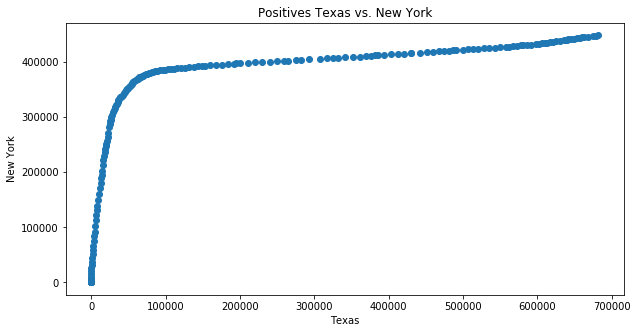

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(clean_tx["positive"], clean_ny["positive"])
plt.title("Positives Texas vs. New York")
plt.xlabel("Texas")
plt.ylabel("New York")

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(clean_tx["positive"], clean_ny["positive"])
plt.title("Texas Positives Covid Results vs. Texas Unemployement")
plt.xlabel("Texas")
plt.ylabel("New York")